In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import io

from scipy.constants import hour, minute

In [46]:
data_folder = Path('data/2025/')
data_file = data_folder/"MagArrow-26.zip"

In [47]:
22 - 7

15

In [48]:
frm = pd.read_csv(data_file)
frm['Time'] = '15:' + frm['Time']

C:\Users\Joseph\AppData\Local\Temp\ipykernel_38076\4054197437.py:1: DtypeWarning: Columns (1,2,26,28,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  frm = pd.read_csv(data_file)


In [49]:
good_points = (frm[' MagValid'] == 1) & (frm['LocationSource'] != 'N')

In [50]:
frm_good = frm[good_points].reset_index(drop=True)
frm_good = frm_good.drop(columns=
  ['Counter', ' MagValid', "CompassX", " CompassY", " CompassZ", "GyroscopeX", " GyroscopeY", " GyroscopeZ",
   'AccelerometerX', ' AccelerometerY', ' AccelerometerZ', 'ImuTemperature', 'Track', 'LocationSource', 'Hdop',
   'FixQuality', ' SatellitesUsed', ' Altitude','HeightOverEllipsoid', 'SpeedOverGround', 'MagneticVariation', 'VariationDirection',
   'ModeIndicator', 'GgaSentence', 'RmcSentence', 'EventCode', 'EventInfo', 'EventDataLength', 'EventData',
  ])
frm_good

,Date,Time,Latitude,Longitude,Mag
0,11/20/2025,15:46:05.0,39.751278,-105.221592,50159.76390
1,11/20/2025,15:46:05.0,39.751278,-105.221592,50158.67395
2,11/20/2025,15:46:05.0,39.751278,-105.221592,50159.30025
3,11/20/2025,15:46:05.0,39.751278,-105.221592,50162.31605
4,11/20/2025,15:46:05.0,39.751278,-105.221592,50166.10425
...,...,...,...,...,...
340997,11/20/2025,15:52:12.0,39.751253,-105.221362,50362.46845
340998,11/20/2025,15:52:12.0,39.751253,-105.221362,50362.45060
340999,11/20/2025,15:52:12.0,39.751253,-105.221362,50365.32215
341000,11/20/2025,15:52:12.0,39.751253,-105.221362,50369.82335


In [51]:
times = pd.to_timedelta(frm_good['Time'])
times

0        0 days 15:46:05
1        0 days 15:46:05
2        0 days 15:46:05
3        0 days 15:46:05
4        0 days 15:46:05
               ...      
340997   0 days 15:52:12
340998   0 days 15:52:12
340999   0 days 15:52:12
341000   0 days 15:52:12
341001   0 days 15:52:12
Name: Time, Length: 341002, dtype: timedelta64[ns]

In [52]:
frm_good['MST (Sec)'] = times.dt.total_seconds()

In [53]:
frm_good['MST (Sec)']

0         56765.0
1         56765.0
2         56765.0
3         56765.0
4         56765.0
           ...   
340997    57132.0
340998    57132.0
340999    57132.0
341000    57132.0
341001    57132.0
Name: MST (Sec), Length: 341002, dtype: float64

In [54]:
from scipy.signal import decimate, resample, resample_poly

In [55]:
resample_poly

<function scipy.signal._signaltools.resample_poly(x, up, down, axis=0, window=('kaiser', 5.0), padtype='constant', cval=None)>

In [56]:
n_dec = 100

In [57]:
frm_dec = pd.DataFrame({
    'Date (MM/DD/YYYY)': frm_good['Date'][::n_dec].reset_index(drop=True),
    'Time (HH:MM:SS.S MST)': frm_good['Time'][::n_dec].reset_index(drop=True),
    'MST (Sec)': frm_good['MST (Sec)'][::n_dec].reset_index(drop=True),
    'Latitude (Deg N)': frm_good['Latitude'][::n_dec].reset_index(drop=True),
    'Longitude (Deg E)': frm_good['Longitude'][::n_dec].reset_index(drop=True),
    'Mag (nT)': resample_poly(frm_good['Mag'], up=1, down=n_dec, padtype='line')
})

In [58]:
frm_dec

,Date (MM/DD/YYYY),Time (HH:MM:SS.S MST),MST (Sec),Latitude (Deg N),Longitude (Deg E),Mag (nT)
0,11/20/2025,15:46:05.0,56765.0,39.751278,-105.221592,50162.677256
1,11/20/2025,15:46:05.1,56765.1,39.751278,-105.221592,50165.098594
2,11/20/2025,15:46:05.2,56765.2,39.751278,-105.221592,50164.199316
3,11/20/2025,15:46:05.3,56765.3,39.751278,-105.221592,50166.860763
4,11/20/2025,15:46:05.4,56765.4,39.751278,-105.221592,50168.067399
...,...,...,...,...,...,...
3406,11/20/2025,15:52:11.6,57131.6,39.751253,-105.221362,50369.950060
3407,11/20/2025,15:52:11.7,57131.7,39.751253,-105.221362,50369.766281
3408,11/20/2025,15:52:11.8,57131.8,39.751253,-105.221362,50369.946116
3409,11/20/2025,15:52:11.9,57131.9,39.751253,-105.221362,50369.474701


In [59]:
frm_dec.to_csv('MagArrow-26_dec.csv', index=False)

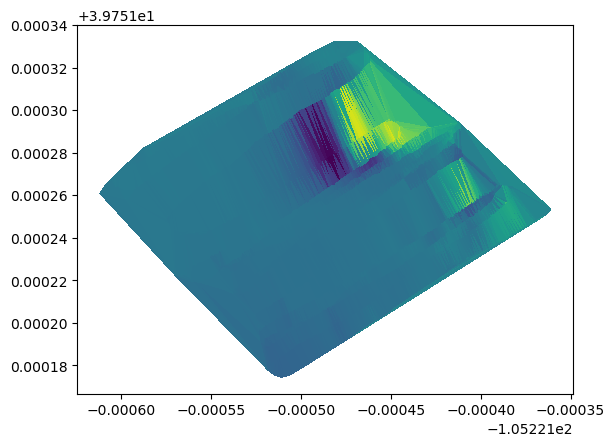

In [60]:
plt.tripcolor(frm_dec['Longitude (Deg E)'], frm_dec['Latitude (Deg N)'], frm_dec['Mag (nT)'])